# 第16章 处理日期和时间
## 16.1 简介
本章将介绍如何在 Python 中处理日期和时间。日期和时间非常复杂，因为它们要兼顾两种物理现象（地球的自转以及围绕太阳的公转）和一系列地理政治现象（包括月份、时区和夏时制）。虽然本章不会介绍关于日期和时间的所有细节，但提供了处理日期和时间的实用技能的坚实基础，以帮助我们解决常见的有关日期和时间的分析问题。

准备工作：本章主要讨论 Datetime 模块，它可以使得 Python 对日期和时间的处理更加容易。我们还需要将 nycflights13 包作为练习数据。

In [12]:
from nycflights13 import flights
from datetime import datetime, timedelta
import pandas as pd

## 16.2 创建日期或时间
Datetime模块中主要包含如下类：
* Date：日期对象，常用的属性有year, month, day
* Time：时间对象，常用的属性有hour, minute, second
* Datetime：日期时间对象
* Timedelta：时间间隔，即两个时间点之间的长度
* Tzinfo：时区信息对象

要想得到当前日期时间，可以使用 `datetime.now()` 函数：

In [13]:
datetime.now()

datetime.datetime(2020, 11, 27, 13, 6, 28, 593497)

In [14]:
datetime.now().date()

datetime.date(2020, 11, 27)

In [15]:
datetime.now().time()

datetime.time(13, 6, 28, 619459)

In [16]:
# 也可以直接用 datetime() 函数创建对象
datetime(2020, 11, 26, 18, 20, 16)

datetime.datetime(2020, 11, 26, 18, 20, 16)

除此之外，以下 3 种方法也可以创建日期或时间。
* 通过字符串创建
* 通过日期时间的各个成分创建
* 通过现有的日期时间对象创建

接下来我们将分别介绍这 3 种方法。

### 16.2.1 通过字符串创建

In [17]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [19]:
from dateutil import parser
parser.parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [20]:
parser.parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [76]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)
# 通常用来处理成组的日期

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

### 16.2.2 通过各个成分创建
除了单个字符串，日期时间数据的各个成分还经常分布在表格的多个列中。航班数据就是这样的：

In [22]:
flights.head(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01T10:00:00Z
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,2013-01-01T11:00:00Z
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,2013-01-01T11:00:00Z
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,2013-01-01T11:00:00Z
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,2013-01-01T11:00:00Z


In [77]:
flights_time = flights[['year', 'month', 'day', 'hour', 'minute']].copy()
flights_time['departure'] = pd.to_datetime(flights_time)
flights_time['departure']

0        2013-01-01 05:15:00
1        2013-01-01 05:29:00
2        2013-01-01 05:40:00
3        2013-01-01 05:45:00
4        2013-01-01 06:00:00
                 ...        
336771   2013-09-30 14:55:00
336772   2013-09-30 22:00:00
336773   2013-09-30 12:10:00
336774   2013-09-30 11:59:00
336775   2013-09-30 08:40:00
Name: departure, Length: 336776, dtype: datetime64[ns]

我们对 flights 中的 4 个时间列进行相同的操作。因为时间的表示方法有点奇怪，所以我们先使用模运算将小时成分与分钟成分分离。

In [24]:
flights_dt = flights[~(flights['dep_time'].isna()) & ~(flights['arr_time'].isna())].copy()
flights_dt['dep_hour'] = flights_dt['dep_time']//100
flights_dt['dep_minute'] = flights_dt['dep_time']%100
flights_dt['arr_hour'] = flights_dt['arr_time']//100
flights_dt['arr_minute'] = flights_dt['arr_time']%100
flights_dt['sched_dep_hour'] = flights_dt['sched_dep_time']//100
flights_dt['sched_dep_minute'] = flights_dt['sched_dep_time']%100
flights_dt['sched_arr_hour'] = flights_dt['sched_arr_time']//100
flights_dt['sched_arr_minute'] = flights_dt['sched_arr_time']%100

cols = ['year', 'month', 'day', 'dep_hour', 'dep_minute']
d = {'dep_hour':'hour', 'dep_minute':'minute'}
flights_dt['dep_time'] = pd.to_datetime(flights_dt[cols].rename(columns = d)) 

cols = ['year', 'month', 'day', 'arr_hour', 'arr_minute']
d = {'arr_hour':'hour', 'arr_minute':'minute'}
flights_dt['arr_time'] = pd.to_datetime(flights_dt[cols].rename(columns = d)) 

cols = ['year', 'month', 'day', 'sched_dep_hour', 'sched_dep_minute']
d = {'sched_dep_hour':'hour', 'sched_dep_minute':'minute'}
flights_dt['sched_dep_time'] = pd.to_datetime(flights_dt[cols].rename(columns = d)) 

cols = ['year', 'month', 'day', 'sched_arr_hour', 'sched_arr_minute']
d = {'sched_arr_hour':'hour', 'sched_arr_minute':'minute'}
flights_dt['sched_arr_time'] = pd.to_datetime(flights_dt[cols].rename(columns = d)) 

flights_dt = flights_dt[['origin', 'dest', 'dep_delay', 'arr_delay', 'air_time', 'dep_time', 'arr_time', 'sched_dep_time', 'sched_arr_time']]
flights_dt.head(10)

,origin,dest,dep_delay,arr_delay,air_time,dep_time,arr_time,sched_dep_time,sched_arr_time
0,EWR,IAH,2.0,11.0,227.0,2013-01-01 05:17:00,2013-01-01 08:30:00,2013-01-01 05:15:00,2013-01-01 08:19:00
1,LGA,IAH,4.0,20.0,227.0,2013-01-01 05:33:00,2013-01-01 08:50:00,2013-01-01 05:29:00,2013-01-01 08:30:00
2,JFK,MIA,2.0,33.0,160.0,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 05:40:00,2013-01-01 08:50:00
3,JFK,BQN,-1.0,-18.0,183.0,2013-01-01 05:44:00,2013-01-01 10:04:00,2013-01-01 05:45:00,2013-01-01 10:22:00
4,LGA,ATL,-6.0,-25.0,116.0,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 06:00:00,2013-01-01 08:37:00
5,EWR,ORD,-4.0,12.0,150.0,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 05:58:00,2013-01-01 07:28:00
6,EWR,FLL,-5.0,19.0,158.0,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 06:00:00,2013-01-01 08:54:00
7,LGA,IAD,-3.0,-14.0,53.0,2013-01-01 05:57:00,2013-01-01 07:09:00,2013-01-01 06:00:00,2013-01-01 07:23:00
8,JFK,MCO,-3.0,-8.0,140.0,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 06:00:00,2013-01-01 08:46:00
9,LGA,ORD,-2.0,8.0,138.0,2013-01-01 05:58:00,2013-01-01 07:53:00,2013-01-01 06:00:00,2013-01-01 07:45:00


我们可以使用这些数据做出一年间出发时间的可视化分布：

E:\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 71'. Pick better value with 'binwidth'.


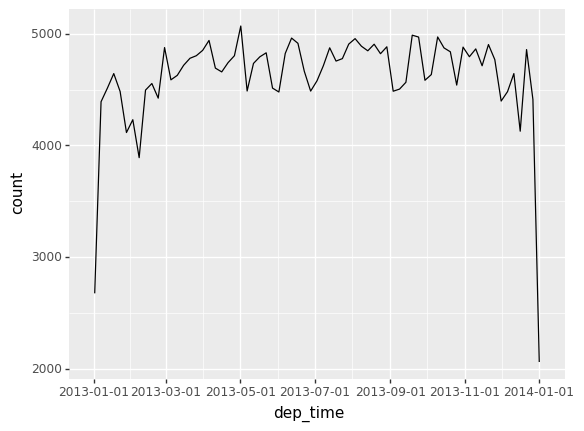

<ggplot: (127970081133)>

In [25]:
from plotnine import *
(ggplot(flights_dt, aes(x = 'dep_time')) 
+ geom_freqpoly())

或者在第一天内的分布：

E:\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 11'. Pick better value with 'binwidth'.


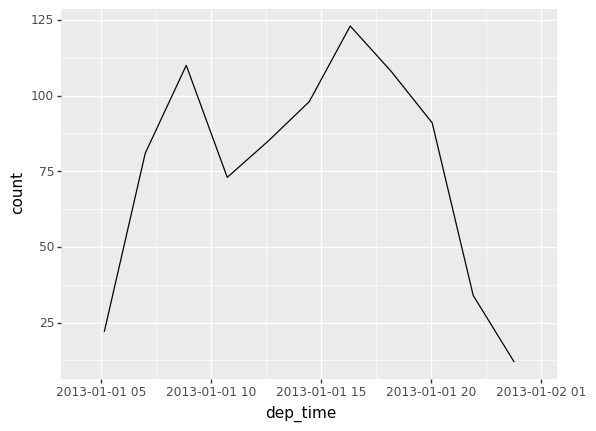

<ggplot: (127982301889)>

In [26]:
(ggplot(flights_dt[flights_dt['dep_time'].__lt__(datetime(2013,1,2))], aes('dep_time')) 
+ geom_freqpoly()
+ scale_x_date(breaks='5 hours', date_labels='%Y-%m-%d %H'))

### 16.2.3 通过其他类型数据创建
有时我们会使用“Unix 时间戳”（即 1970-01-01）的偏移量来表示日期时间。

In [80]:
import time
dtime = datetime.now()
dtime

datetime.datetime(2020, 11, 27, 17, 43, 54, 581067)

In [81]:
time.mktime(dtime.timetuple())

1606470234.0

In [82]:
unix_ts = 1606470234.0
datetime.fromtimestamp(unix_ts)

datetime.datetime(2020, 11, 27, 17, 43, 54)

## 16.3 日期时间成分
现在我们已经知道了如何将日期时间型数据保存在 Python 的相应数据结构中。接下来我们研究一下能够对这些数据进行何种处理。

本节将重点介绍如何获取和设置日期时间成分。
### 16.3.1获取成分
如果想要提取出日期中的独立成分，可以使用`datetime.year`, `datetime.day`等函数。

In [29]:
time = parser.parse('2016-07-08, 12:34:56')
time.year

2016

In [30]:
time.month

7

In [31]:
time.day

8

In [32]:
time.weekday()
# 该方法返回数字0—6，依次代表周一到周天

4

通过 weekday() 函数，我们可以知道在工作日出发的航班要多于周末出发的航班：

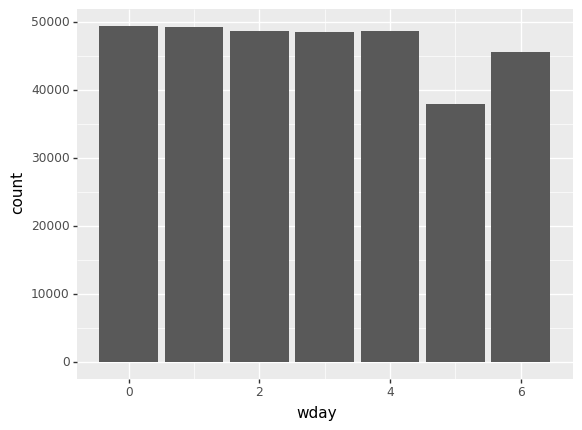

<ggplot: (127982778597)>

In [33]:
flights_dt['wday'] = flights_dt['dep_time'].apply(lambda x : x.weekday())
(ggplot(flights_dt, aes(x = 'wday')) 
+ geom_bar())

如果查看一小时内每分钟的平均出发延误，我们可以发现一个有趣的模式。似乎在第 20-30 分钟和第 50-60 分钟内出发的航班的延误时间远远低于其他时间出发的航班！

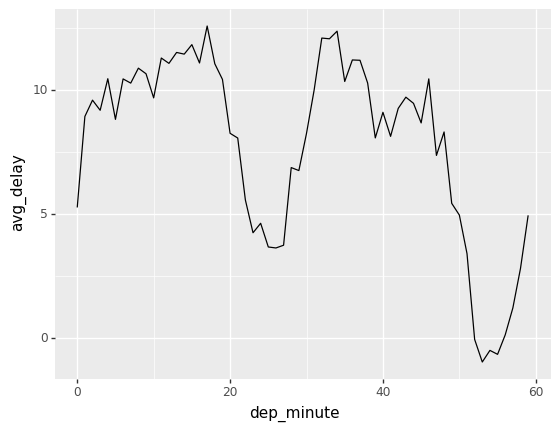

<ggplot: (127982741532)>

In [34]:
flights_dt['dep_minute'] = flights_dt['dep_time'].apply(lambda x : x.minute)
by_minute = flights_dt.groupby('dep_minute').agg({'arr_delay':[('avg_delay','mean')],
                                                  'dep_minute':[('count','count')]})
by_minute.columns = by_minute.columns.droplevel(0)
by_minute = by_minute.reset_index()

(ggplot(by_minute, aes(x = 'dep_minute', y = 'avg_delay')) 
+ geom_line())

有趣的是，如果检查计划出发时间，我们就会发现其中没有这么明显的模式：

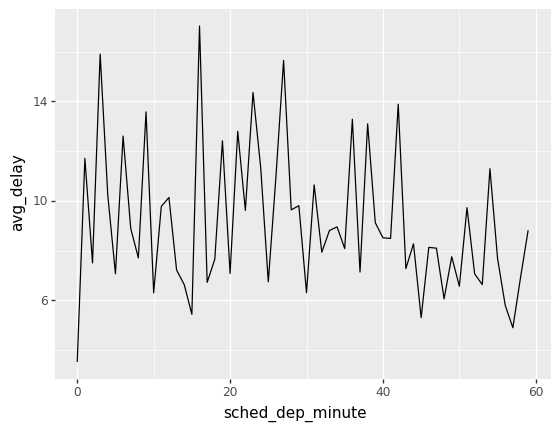

<ggplot: (127982863948)>

In [35]:
flights_dt['sched_dep_minute'] = flights_dt['sched_dep_time'].apply(lambda x : x.minute)
by_minute_sched = flights_dt.groupby('sched_dep_minute').agg({'arr_delay':[('avg_delay','mean')],
                                                  'sched_dep_minute':[('count','count')]})
by_minute_sched.columns=by_minute_sched.columns.droplevel(0)
by_minute_sched = by_minute_sched.reset_index()

(ggplot(by_minute_sched, aes(x = 'sched_dep_minute', y = 'avg_delay')) 
+ geom_line())

那么，为什么我们会在实际的出发时间中看到这种模式呢？

与人工收集的很多数据一样，航班数据也严重倾向于在“美妙的”时间出发的那些航班。只要处理的数据涉及人工判断，那么你就要对这种模式保持警惕！

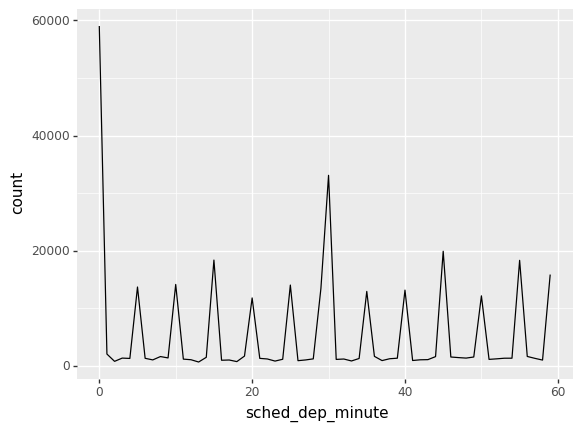

<ggplot: (127982761117)>

In [36]:
(ggplot(by_minute_sched, aes(x = 'sched_dep_minute', y = 'count')) 
+ geom_line())

### 16.3.2 舍入
我们可以使用一些函数将日期舍入到临近的一个时间单位。

`time.strftime()`函数接收以时间元组，并返回以可读字符串表示的当地时间，例如：
* %m 月份（01-12）
* %j 年内的一天（001-366）
* %W 一年中的星期数（00-53）

……

In [37]:
dt1 = datetime(2018, 10, 10)
dt1.strftime("%j")

'283'

In [38]:
dt1.strftime("%W")

'41'

我们可以使用这个函数，绘制出每周的航班数量：

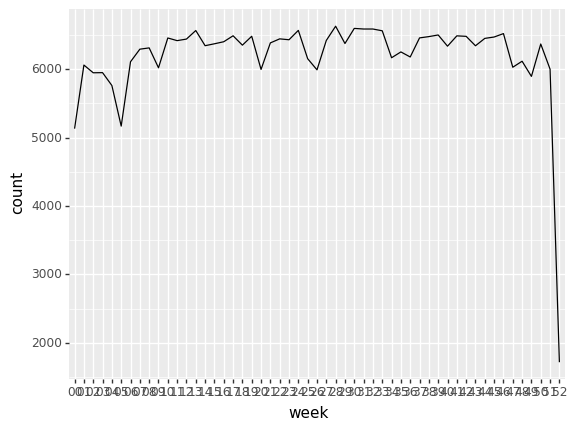

<ggplot: (127982737044)>

In [39]:
flights_dt['week'] = flights_dt['dep_time'].apply(lambda x : x.strftime("%W") )
by_week = flights_dt.groupby('week').agg({'week':[('count','count')]})
by_week.columns = by_week.columns.droplevel(0)
by_week = by_week.reset_index()

(ggplot(by_week, aes(x = 'week', y = 'count', group = 1)) 
+ geom_line())

### 16.3.3 设置成分
可以使用`datetime.replace()`函数来设置日期时间中的成分：

In [40]:
a = parser.parse('2016-07-08, 12:34:56')
a.replace(2015, 2, 1)

datetime.datetime(2015, 2, 1, 12, 34, 56)

我们可以使用这个函数来显示这一年中所有航班的出发时间在一天内的分布：

E:\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 96'. Pick better value with 'binwidth'.


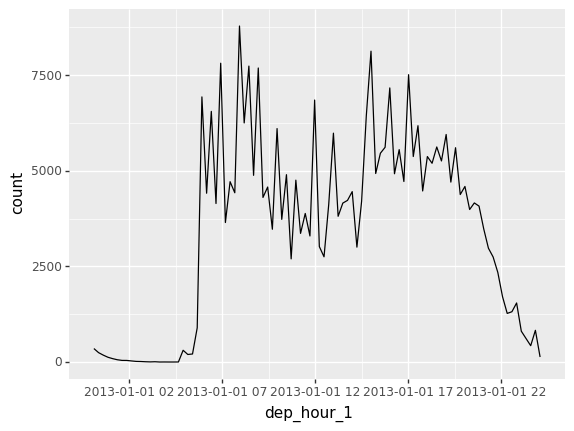

<ggplot: (127982761063)>

In [83]:
flights_dt['dep_hour_1'] = flights_dt['dep_time'].apply(lambda x : x.replace(2013, 1, 1))
(ggplot(flights_dt, aes('dep_hour_1')) 
+ geom_freqpoly()
+ scale_x_date(breaks='5 hours', date_labels='%Y-%m-%d %H'))

## 16.4 时间间隔
接下来介绍如何对日期进行数学运算。

In [84]:
start_time = datetime.now()
start_time

datetime.datetime(2020, 11, 27, 18, 0, 26, 539255)

In [85]:
end_time = datetime.now()
end_time

datetime.datetime(2020, 11, 27, 18, 0, 31, 786656)

In [86]:
end_time - start_time

datetime.timedelta(seconds=5, microseconds=247401)

In [87]:
end_time.__sub__(start_time)
# __rsub__()反向操作

datetime.timedelta(seconds=5, microseconds=247401)

R语言中有 3 种用于表示时间间隔的种类：
* 时期：以秒为单位表示一段精确的时间
* 阶段：表示由人工定义的一段时间，如几周或几个月
* 区间：表示从起点到终点的一段时间

### 16.4.1 时期
R语言 lubridate 提供了总是使用秒为单位的计时对象——时期。

### 16.4.2 阶段
阶段也是一种时间间隔，但它不以秒为单位；相反，它使用“人工”时间，比如日和月，这使得它们使用起来更加直观。

Python 中 timedelta 类就是用来计算两个 datetime 对象的差值的。此类中包含 days, hours, seconds 等属性。

In [47]:
a = datetime.now()
a 

datetime.datetime(2020, 11, 27, 13, 42, 36, 872068)

In [48]:
a + timedelta(days = 30)

datetime.datetime(2020, 12, 27, 13, 42, 36, 872068)

In [49]:
a + timedelta(hours = 400)

datetime.datetime(2020, 12, 14, 5, 42, 36, 872068)

In [50]:
a + timedelta(seconds = 172800)

datetime.datetime(2020, 11, 29, 13, 42, 36, 872068)

In [54]:
from pandas.tseries.offsets import Hour, Minute, Day
Day(3) + Hour(2) + Minute(30)

<4470 * Minutes>

In [55]:
timedelta(days = 3) + timedelta(hours = 2) + timedelta(minutes = 30)

datetime.timedelta(days=3, seconds=9000)

In [56]:
10 * (Hour(60) + Day(3))

<1320 * Hours>

In [57]:
a + 3 * Day()

Timestamp('2020-11-30 13:42:36.872068')

下面我们使用阶段来解决与航班日期有关的一个怪现象。有些飞机似乎在从纽约市起飞前就到达了目的地：

In [58]:
flights_dt[flights_dt['arr_time'] < flights_dt['dep_time']]

,origin,dest,dep_delay,arr_delay,air_time,dep_time,arr_time,sched_dep_time,sched_arr_time,wday,dep_minute,sched_dep_minute,week,dep_hour_1
719,EWR,BQN,9.0,-4.0,192.0,2013-01-01 19:29:00,2013-01-01 00:03:00,2013-01-01 19:20:00,2013-01-01 00:07:00,1,29,20,00,2013-01-01 19:29:00
725,JFK,DFW,59.0,NaN,NaN,2013-01-01 19:39:00,2013-01-01 00:29:00,2013-01-01 18:40:00,2013-01-01 21:51:00,1,39,40,00,2013-01-01 19:39:00
791,EWR,TPA,-2.0,9.0,159.0,2013-01-01 20:58:00,2013-01-01 00:08:00,2013-01-01 21:00:00,2013-01-01 23:59:00,1,58,0,00,2013-01-01 20:58:00
794,EWR,SJU,-6.0,-12.0,199.0,2013-01-01 21:02:00,2013-01-01 01:46:00,2013-01-01 21:08:00,2013-01-01 01:58:00,1,2,8,00,2013-01-01 21:02:00
797,EWR,SFO,11.0,-14.0,354.0,2013-01-01 21:08:00,2013-01-01 00:25:00,2013-01-01 20:57:00,2013-01-01 00:39:00,1,8,57,00,2013-01-01 21:08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336753,JFK,SJU,0.0,-25.0,192.0,2013-09-30 21:45:00,2013-09-30 01:15:00,2013-09-30 21:45:00,2013-09-30 01:40:00,0,45,45,39,2013-01-01 21:45:00
336754,LGA,FLL,10.0,3.0,139.0,2013-09-30 21:47:00,2013-09-30 00:30:00,2013-09-30 21:37:00,2013-09-30 00:27:00,0,47,37,39,2013-01-01 21:47:00
336762,EWR,SFO,80.0,42.0,318.0,2013-09-30 22:33:00,2013-09-30 01:12:00,2013-09-30 21:13:00,2013-09-30 00:30:00,0,33,13,39,2013-01-01 22:33:00
336763,JFK,MCO,154.0,130.0,123.0,2013-09-30 22:35:00,2013-09-30 00:59:00,2013-09-30 20:01:00,2013-09-30 22:49:00,0,35,1,39,2013-01-01 22:35:00


这些都是过夜航班。我们使用了同一种日期来表示出发时间和到达时间，但这些航班是在第二天到达的。

将每个过夜航班的到达时间加上 1 天，就可以解决这个问题了：

In [59]:
flights_dt['overnight'] = flights_dt['arr_time'] < flights_dt['dep_time']
flights_dt['arr_time'] = flights_dt['arr_time'] + timedelta(days = 1) * flights_dt['overnight']
flights_dt[flights_dt['arr_time'] < flights_dt['dep_time']]

,origin,dest,dep_delay,arr_delay,air_time,dep_time,arr_time,sched_dep_time,sched_arr_time,wday,dep_minute,sched_dep_minute,week,dep_hour_1,overnight


### 16.4.3 区间
在 R 语言中，`years(1) / days(1)`应该返回什么呢？如果年份是 2015 年，那么结果就是 365，但如果年份是 2016 年，那么结果就是 366 ！没有足够的信息让 lubridate 返回一个明确的结果。lubridate 的做法是给出一个估计值，同时给出一条警告：

`years(1) / days(1) `

`#> estimate only: convert to intervals for accuracy`

`#> [1] 365`

如果需要更精确的测量方式，我们就必须使用区间。区间是带有起点的时期，这使得其非常精确，我们可以确切地知道它的长度。

In [61]:
# pd.Period()参数：一个时间戳 + freq 参数 → freq 用于指明该 period 的长度，时间戳则说明该 period 在时间轴上的位置
p = pd.Period('2012-01', freq='2M')
p + 2

Period('2012-05', '2M')

## 16.5 时区
时区是个非常复杂的主题，因为其受很多地理政治因素的影响。Python 使用国际标准 IANA 时区。这些时区使用统一带有 “/” 的命名方式，一般的形式为 “< 大陆 >/< 城市 >”。如 “America/New_York”、“Europe/Paris” 和 “Pacific/Auckland”。

In [62]:
import pytz
pytz.common_timezones[:10]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre']

In [63]:
tz1 = pytz.timezone('America/New_York')
tz2 = pytz.timezone('Europe/Copenhagen')
tz3 = pytz.timezone('Pacific/Auckland')

In [64]:
x1 = datetime(2015,6,1,12, tzinfo = tz1)
x2 = datetime(2015,6,1,18, tzinfo = tz2)
x3 = datetime(2015,6,2,4, tzinfo = tz3)

In [65]:
x1 - x2

datetime.timedelta(days=-1, seconds=85560)

In [66]:
datetime(2015,6,1,12, tzinfo = tz1) # LMT学名Local Mean Time，用于比较平均日出时间

datetime.datetime(2015, 6, 1, 12, 0, tzinfo=<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>)

In [67]:
x1 = tz1.localize(datetime(2015,6,1,12,0,0))
x2 = tz2.localize(datetime(2015,6,1,18,0,0))
x3 = tz3.localize(datetime(2015,6,2,4,0,0))

In [68]:
x1 - x2

datetime.timedelta(0)

In [69]:
tz1.localize(datetime(2015,6,1,12,0,0)) # EDT 北美东部夏令时间

datetime.datetime(2015, 6, 1, 12, 0, tzinfo=<DstTzInfo 'America/New_York' EDT-1 day, 20:00:00 DST>)

使用`astimezone()`函数修改时区：

In [72]:
x4 = pd.Series([x1, x2, x3])
x4

0    2015-06-01 12:00:00-04:00
1    2015-06-01 18:00:00+02:00
2    2015-06-02 04:00:00+12:00
dtype: object

In [73]:
tz = pytz.timezone('Australia/Lord_Howe')
x4a = x4.apply(lambda x : x.astimezone(tz))

In [71]:
x4a

0   2015-06-02 02:30:00+10:30
1   2015-06-02 02:30:00+10:30
2   2015-06-02 02:30:00+10:30
dtype: datetime64[ns, Australia/Lord_Howe]

In [75]:
x4a.__eq__(x4)

0    True
1    True
2    True
dtype: bool